In [57]:
import pandas as pd
import numpy as np
import pickle
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Input
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.preprocessing import StandardScaler

from pathlib import Path

In [58]:
# Load data
data = pd.read_csv(Path.cwd() / '..' / 'data' / '22_12_29_ga.csv')
usedf = data.drop(["Generation"], axis=1)
# Now add errors to the data
errors = pickle.load(open(Path.cwd() / '..' / 'data' / 'df_errors.pkl', 'rb'))
minus_err = errors["Minus_Errs"].values
plus_err = errors["Plus_Errs"].values
#usedf["Minus_Errs"] = minus_err
#usedf["Plus_Errs"] = plus_err
print(usedf.head())
X = usedf.drop(['Fitness'], axis=1).values
y = usedf['Fitness'].values
print(X, y)


   InnerRadius    Length  Quadratic    Linear  InnerRadius2  Length2  \
0     2.785070   44.1456  -0.008193  0.306436       3.20903  37.9422   
1     6.646530   65.2695   0.001421 -0.119595       2.04081  51.5247   
2     6.249200   42.8384   0.002491 -0.140030       3.77085  38.4759   
3     7.290460   66.8939   0.004028 -0.300474       3.74365  45.2208   
4     0.414064  125.7330  -0.000943  0.146930       6.13380  66.8088   

   Quadratic2   Linear2  Fitness  
0    0.001423 -0.078648  5.20443  
1   -0.002964  0.179673  5.28597  
2   -0.000356  0.024653  5.11788  
3    0.004745 -0.249696  5.15964  
4    0.003556 -0.230589  4.61805  
[[ 2.78507e+00  4.41456e+01 -8.19300e-03 ...  3.79422e+01  1.42300e-03
  -7.86480e-02]
 [ 6.64653e+00  6.52695e+01  1.42100e-03 ...  5.15247e+01 -2.96400e-03
   1.79673e-01]
 [ 6.24920e+00  4.28384e+01  2.49100e-03 ...  3.84759e+01 -3.56000e-04
   2.46530e-02]
 ...
 [ 4.83013e+00  1.06151e+01  4.67400e-02 ...  3.12284e+01  5.82900e-03
  -3.19120e-02]
 [ 5

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
x_train_minus_errs, x_test_minus_errs, x_train_plus_errs, x_test_plus_errs= train_test_split(minus_err, plus_err, test_size=0.20, random_state=42)

# define base model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Input(shape=(8,)))
    model.add(Dense(32, kernel_initializer='normal', activation='relu'))
    model.add(Dense(64, kernel_initializer='normal', activation='relu'))
    model.add(Dense(64, kernel_initializer='normal', activation='relu'))
    model.add(Dense(32, kernel_initializer='normal', activation='relu'))
    model.add(Dense(16, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='linear'))
    # Compile model
    model.compile(loss='mse', optimizer='adam', metrics=['mse'])
    return model

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# evaluate model with standardized dataset
#estimator = KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=5, verbose=1)

regressor = baseline_model()

regressor.compile(optimizer='adam', loss='mse', metrics=['mse'])

history = regressor.fit(X_train, y_train, epochs=250, batch_size=16, 
                        validation_data=(X_test, y_test))

y_pred = regressor.predict(X_test)

mse = sklearn.metrics.mean_squared_error(y_test, y_pred)

print(mse)

Epoch 1/250
155/155 [==============================] - 1s 2ms/step - loss: 11.1837 - mse: 11.1837 - val_loss: 0.5280 - val_mse: 0.5280
Epoch 2/250
155/155 [==============================] - 0s 992us/step - loss: 0.3335 - mse: 0.3335 - val_loss: 0.2134 - val_mse: 0.2134
Epoch 3/250
155/155 [==============================] - 0s 968us/step - loss: 0.1460 - mse: 0.1460 - val_loss: 0.1185 - val_mse: 0.1185
Epoch 4/250
155/155 [==============================] - 0s 969us/step - loss: 0.0885 - mse: 0.0885 - val_loss: 0.0809 - val_mse: 0.0809
Epoch 5/250
155/155 [==============================] - 0s 1ms/step - loss: 0.0606 - mse: 0.0606 - val_loss: 0.0672 - val_mse: 0.0672
Epoch 6/250
155/155 [==============================] - 0s 986us/step - loss: 0.0494 - mse: 0.0494 - val_loss: 0.0481 - val_mse: 0.0481
Epoch 7/250
155/155 [==============================] - 0s 1ms/step - loss: 0.0412 - mse: 0.0412 - val_loss: 0.0417 - val_mse: 0.0417
Epoch 8/250
155/155 [==============================] - 0s 1

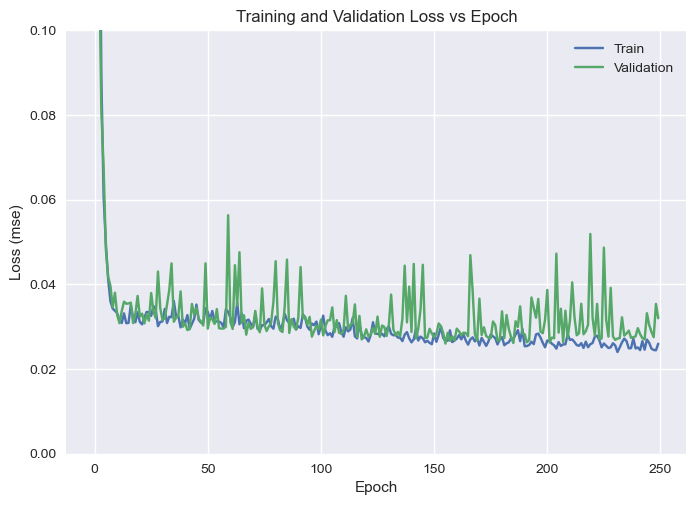

In [60]:

# print the training loss, validation loss vs epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylim(0, 0.1)
plt.legend(['Train', 'Validation'], loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss (mse)')
plt.title('Training and Validation Loss vs Epoch')
plt.show()


Mean squared error: 0.03200


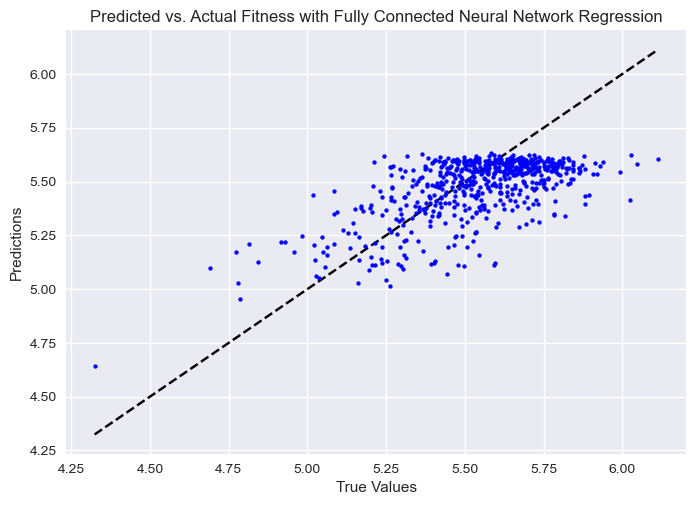

In [74]:
#print the mean squared error
print("Mean squared error: %.5f" % mse)
# set style to seaborn
plt.style.use('seaborn')
plt.scatter(y_test, y_pred, s=30, c='b', marker='.', zorder=10)
minfit = np.min(y_test)
maxfit = np.max(y_test)
plt.plot([minfit, maxfit], [minfit, maxfit], '--k')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Predicted vs. Actual Fitness with Fully Connected Neural Network Regression')
plt.show()

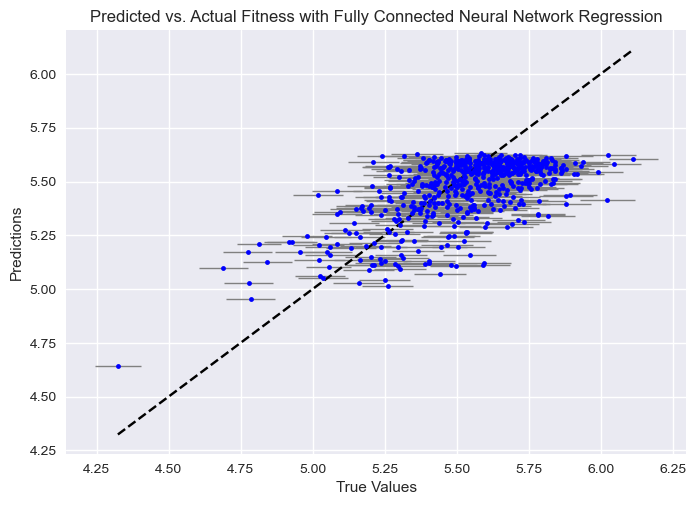

In [73]:
# set style to seaborn
plt.style.use('seaborn')
plt.errorbar(y_test, y_pred, xerr=[x_test_minus_errs, x_test_plus_errs], fmt='.', color='b',
                ecolor='gray', elinewidth=1, capsize=0.8)
minfit = np.min(y_test)
maxfit = np.max(y_test)
plt.plot([minfit, maxfit], [minfit, maxfit], '--k')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Predicted vs. Actual Fitness with Fully Connected Neural Network Regression')
plt.show()

In [72]:
# calculate the percentage of the predicted data that is within the error bars
total_in = 0
for i in range(len(y_test)):
    if y_test[i] - x_test_minus_errs[i] <= y_pred[i] <= y_test[i] + x_test_plus_errs[i]:
        total_in += 1
print("Percentage of predicted data within error bars: %.2f" % (total_in / len(y_test) * 100))

Percentage of predicted data within error bars: 38.55
